In [0]:
# Usar keras 2.2.5
# conda install -c conda-forge keras=2.2.5

In [75]:
import keras
keras.__version__

'2.2.5'

In [76]:
import numpy as np
np.__version__

'1.16.5'

In [0]:
from keras.datasets import imdb as dataset
#from keras.datasets import reuters as dataset
from keras.preprocessing.sequence import pad_sequences
import numpy as np

# Cargamos y analizamos el dataset

In [0]:
# Primer hyperparámetro
num_words=10000

(training_data, training_targets), (testing_data, testing_targets) = dataset.load_data(num_words=num_words+2)
data = np.concatenate((training_data, testing_data), axis=0)
targets = np.concatenate((training_targets, testing_targets), axis=0)

In [185]:
# Tengo dos categorías: Sentimiento positivo (1) o sentimiento negativo (0)
num_categories = len(np.unique(targets))
print("Categories:", np.unique(targets))
# Tengo num_words palabras únicas en el vocabulario
print("Number of unique words:", len(np.unique(np.hstack(data))))

Categories: [0 1]
Number of unique words: 10000


In [186]:
# Longitudes promedio de los comentarios de las películas
length = [len(i) for i in data]
print("Average Review length:", np.mean(length))
print("Standard Deviation:", round(np.std(length)))

Average Review length: 234.75892
Standard Deviation: 173.0


# Impresión de comentario preprocesado con su etiqueta

In [187]:
# Imprimo cometario i'esimo con su clasificación de sentimiento
for i in range(5):
  print("Label:", targets[i])
  # Las comentarios ya están preprocesados
  print(data[i])

Label: 1
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
Label: 0
[1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1

In [188]:
# Bajamos diccionario de palabras a indices
index = dataset.get_word_index()
print([f'{k}:{v}' for k,v in index.items()][:100])

['fawn:34701', 'tsukino:52006', 'nunnery:52007', 'sonja:16816', 'vani:63951', 'woods:1408', 'spiders:16115', 'hanging:2345', 'woody:2289', 'trawling:52008', "hold's:52009", 'comically:11307', 'localized:40830', 'disobeying:30568', "'royale:52010", "harpo's:40831", 'canet:52011', 'aileen:19313', 'acurately:52012', "diplomat's:52013", 'rickman:25242', 'arranged:6746', 'rumbustious:52014', 'familiarness:52015', "spider':52016", 'hahahah:68804', "wood':52017", 'transvestism:40833', "hangin':34702", 'bringing:2338', 'seamier:40834', 'wooded:34703', 'bravora:52018', 'grueling:16817', 'wooden:1636', 'wednesday:16818', "'prix:52019", 'altagracia:34704', 'circuitry:52020', 'crotch:11585', 'busybody:57766', "tart'n'tangy:52021", 'burgade:14129', 'thrace:52023', "tom's:11038", 'snuggles:52025', 'francesco:29114', 'complainers:52027', 'templarios:52125', '272:40835', '273:52028', 'zaniacs:52130', '275:34706', 'consenting:27631', 'snuggled:40836', 'inanimate:15492', 'uality:52030', 'bronte:11926', 

In [189]:
# Armo diccionario reverso: de indices a palabras
reverse_index = dict([(value, key) for (key, value) in index.items()]) 
print([f'{k}:{v}' for k,v in reverse_index.items()][:100])

['34701:fawn', '52006:tsukino', '52007:nunnery', '16816:sonja', '63951:vani', '1408:woods', '16115:spiders', '2345:hanging', '2289:woody', '52008:trawling', "52009:hold's", '11307:comically', '40830:localized', '30568:disobeying', "52010:'royale", "40831:harpo's", '52011:canet', '19313:aileen', '52012:acurately', "52013:diplomat's", '25242:rickman', '6746:arranged', '52014:rumbustious', '52015:familiarness', "52016:spider'", '68804:hahahah', "52017:wood'", '40833:transvestism', "34702:hangin'", '2338:bringing', '40834:seamier', '34703:wooded', '52018:bravora', '16817:grueling', '1636:wooden', '16818:wednesday', "52019:'prix", '34704:altagracia', '52020:circuitry', '11585:crotch', '57766:busybody', "52021:tart'n'tangy", '14129:burgade', '52023:thrace', "11038:tom's", '52025:snuggles', '29114:francesco', '52027:complainers', '52125:templarios', '40835:272', '52028:273', '52130:zaniacs', '34706:275', '27631:consenting', '40836:snuggled', '15492:inanimate', '52030:uality', '11926:bronte', 

In [190]:
for j in range(5):
  decoded = " ".join( [reverse_index.get(i - 3, "#") for i in data[j]] )
  print(data[j])
  print(decoded)
  print()

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
# this film was just brilliant casting location scenery stor

# Padding y formateo de data para entrenar

In [0]:
# Hyperparametro - Longitud máxima de comentario
maxlen=1000

In [0]:
data = pad_sequences(data,maxlen=maxlen)

In [193]:
# Verificamos que todos tengan longitud 1000
print(len(data[0]))
print(np.array([len(d) for d in data]).var())

1000
0.0


In [0]:
data=np.array(data)

In [195]:
data.shape

(50000, 1000)

In [0]:
from keras.layers import Dense
from keras.models import Sequential

In [0]:
from keras.layers import Embedding, Flatten, Dropout
from keras import optimizers

In [0]:
# Cantidad de palabras totales contando las reservadas
nb_words=num_words+3
# Tamano del embedding. Es un hiperparámetro y puede modificarlo
embed_dim=128
salida_capa_densa = 1
dropout=0.5 # Hiperparámetro

model = Sequential()
model.add(Embedding(nb_words, embed_dim, input_length=maxlen, trainable=True))
model.add(Flatten())
# model.add(Dropout(dropout))
model.add(Dense(salida_capa_densa, activation='sigmoid'))

In [235]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 1000, 128)         1280384   
_________________________________________________________________
flatten_8 (Flatten)          (None, 128000)            0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 128001    
Total params: 1,408,385
Trainable params: 1,408,385
Non-trainable params: 0
_________________________________________________________________


In [0]:
# MODIFIQUE HYPERPARAMS A GUSTO
adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)

model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

In [237]:
model.fit(data, targets, batch_size=32, epochs=5) #, validation_split=0.2)

Epoch 1/5
50000/50000 [==============================] - 14s 282us/step - loss: 0.3254 - acc: 0.8540
Epoch 2/5
50000/50000 [==============================] - 13s 269us/step - loss: 0.1140 - acc: 0.9618
Epoch 3/5
50000/50000 [==============================] - 13s 270us/step - loss: 0.0248 - acc: 0.9964
Epoch 4/5
50000/50000 [==============================] - 13s 269us/step - loss: 0.0053 - acc: 0.9997
Epoch 5/5
50000/50000 [==============================] - 13s 269us/step - loss: 0.0015 - acc: 1.0000


In [0]:
embeddings = model.layers[0].get_weights()[0]

In [0]:
from sklearn.neighbors import NearestNeighbors

In [0]:
nearest = NearestNeighbors(n_neighbors=10, metric='cosine')

In [241]:
nearest.fit(embeddings)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                 radius=1.0)

In [0]:
n_pad = 3
palabra = 'worst'
#palabra = 'great'
palabra = 'excellent'
#palabra = 'brilliant'
palabra='cool'
#palabra = 'boring'
palabra='performing'
distances, nearest_indexes = nearest.kneighbors(embeddings[index[palabra]+n_pad].reshape(1, -1))

In [384]:
for n, d in zip(nearest_indexes[0], distances[0]):
  print(n, reverse_index[n-n_pad], d)

3462 performing 0.0
1441 charlie 0.5786236
428 white 0.63077986
6825 mcqueen 0.65509224
1483 approach 0.6555697
9998 retrospect 0.6567013
1883 memories 0.6576399
5366 dont 0.65870106


KeyError: ignored

In [0]:
np.save('embeddings', embeddings)

In [0]:
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE

In [0]:
tsne = TSNE(2, verbose=1)

In [275]:
embed_2d_tsne = tsne.fit_transform(embeddings)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10003 samples in 0.051s...
[t-SNE] Computed neighbors for 10003 samples in 26.144s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10003
[t-SNE] Computed conditional probabilities for sample 2000 / 10003
[t-SNE] Computed conditional probabilities for sample 3000 / 10003
[t-SNE] Computed conditional probabilities for sample 4000 / 10003
[t-SNE] Computed conditional probabilities for sample 5000 / 10003
[t-SNE] Computed conditional probabilities for sample 6000 / 10003
[t-SNE] Computed conditional probabilities for sample 7000 / 10003
[t-SNE] Computed conditional probabilities for sample 8000 / 10003
[t-SNE] Computed conditional probabilities for sample 9000 / 10003
[t-SNE] Computed conditional probabilities for sample 10000 / 10003
[t-SNE] Computed conditional probabilities for sample 10003 / 10003
[t-SNE] Mean sigma: 0.224200
[t-SNE] KL divergence after 250 iterations with early exaggeration: 106.916077
[t-SNE] K

In [276]:
embed_2d_tsne

array([[-2.6941467e-03, -9.6391022e-01],
       [-9.1019773e+00, -1.0348284e+01],
       [ 1.3771458e+00, -7.4921994e+00],
       ...,
       [-5.9455004e+00,  3.0528149e+01],
       [ 2.4054458e+00,  1.7985825e+01],
       [-3.3811578e-01, -8.8255668e-01]], dtype=float32)

In [0]:
TSVD = TruncatedSVD(2)

In [0]:
embed_2d = TSVD.fit_transform(embeddings)

In [0]:
from matplotlib import pyplot as plt

In [0]:
palabras_malas = ['worst', 'boring', 'forgettable', 'uninteresting', 'awful', 'bad', 'waste', 'unwatchable', 'stinker', 'lousy', 'fails']
palabras_buenas = ['brilliant', 'excellent', 'superb', 'delightful', 'perfect', 'cool', 'nice', 'good', 'extraordinary', 'unforgettable']
palabras_neutras = ['the', 'of', 'it', 'tom', 'is', 'in', 'a', 'movie', 'hey', 'i', 'br', 'pay', 'gentleman', 'one', 
                    'performing', 'dont', 'white']

In [386]:
reverse_index[3462 - 3]

'performing'

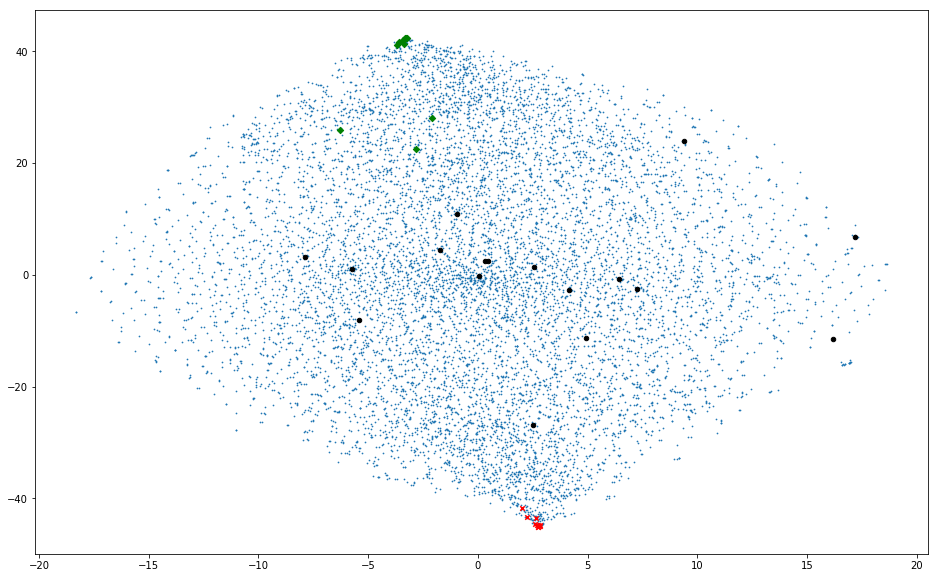

In [387]:
plt.figure(figsize=(16,10))
plt.scatter(embed_2d_tsne[:,0], embed_2d_tsne[:,1], s=0.5)
for palabra in palabras_malas:
  plt.scatter(embed_2d_tsne[index[palabra]+n_pad][0], embed_2d_tsne[index[palabra]+n_pad][1], c='r', s=20, marker='x')
for palabra in palabras_buenas:
  plt.scatter(embed_2d_tsne[index[palabra]+n_pad][0], embed_2d_tsne[index[palabra]+n_pad][1], c='g', s=20, marker='D')
for palabra in palabras_neutras:
  plt.scatter(embed_2d_tsne[index[palabra]+n_pad][0], embed_2d_tsne[index[palabra]+n_pad][1], c='k', s=20)
# plt.scatter(embed_2d_tsne[3462][0], embed_2d_tsne[3462][1], c='k', s=200)
plt.show()

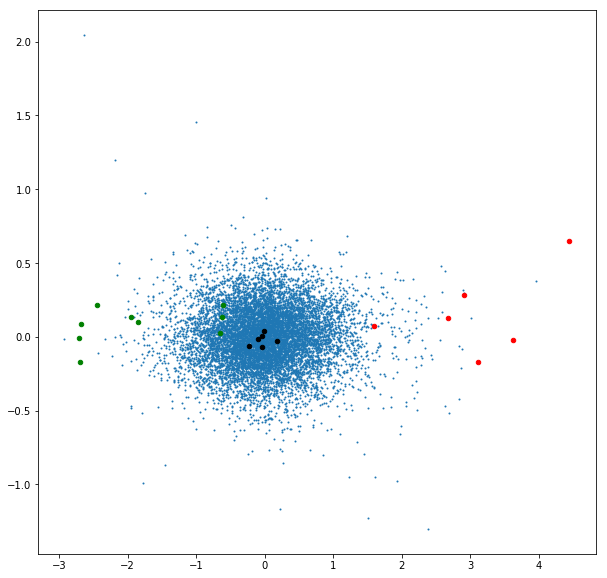

In [322]:
plt.figure(figsize=(10,10))
plt.scatter(embed_2d[:,0], embed_2d[:,1], s=1)
for palabra in palabras_malas:
  plt.scatter(embed_2d[index[palabra]+n_pad][0], embed_2d[index[palabra]+n_pad][1], c='r', s=20)
for palabra in palabras_buenas:
  plt.scatter(embed_2d[index[palabra]+n_pad][0], embed_2d[index[palabra]+n_pad][1], c='g', s=20)
for palabra in palabras_neutras:
  plt.scatter(embed_2d[index[palabra]+n_pad][0], embed_2d[index[palabra]+n_pad][1], c='k', s=20)
plt.show()

In [369]:
np.argmin(np.abs(embed_2d_tsne))

7928

In [376]:
np.argmin(np.abs(embed_2d_tsne).sum(axis=1))

3462